In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('titanic-csv.csv', usecols=['Age', 'Fare', 'Survived'])

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13080\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
X = df.iloc[:, 1:3]
y = df.iloc[:, 0]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape

(712, 2)

In [19]:
X_test.shape

(179, 2)

In [20]:
y_train.shape

(712,)

In [21]:
y_test.shape

(179,)

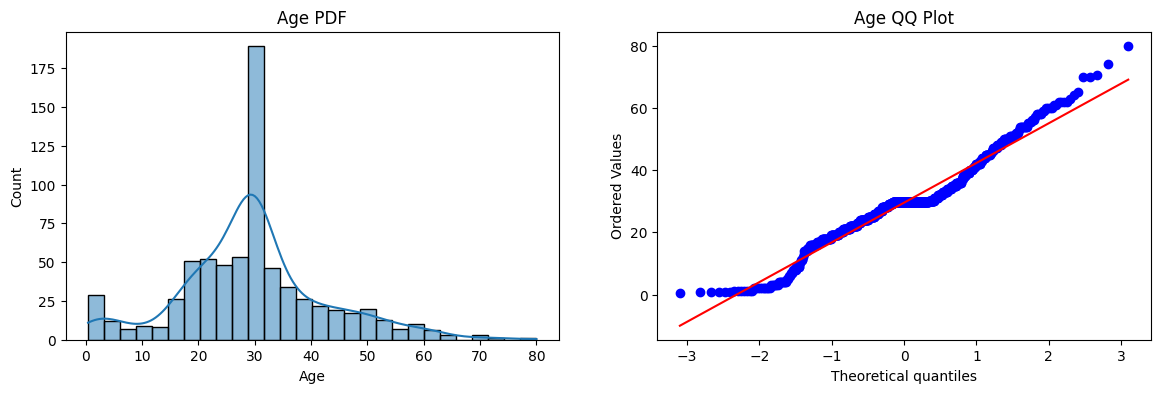

In [34]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

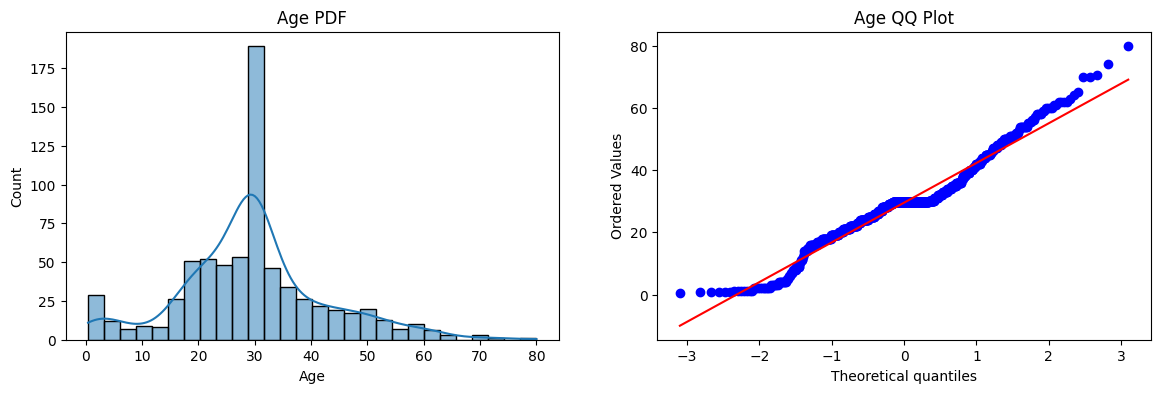

In [46]:
plt.figure(figsize=(14, 4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [47]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [49]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [51]:
y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

In [52]:
print('Accuracy score LR: ', accuracy_score(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred1))

Accuracy score LR:  0.6480446927374302
Accuracy score:  0.6759776536312849
